In [3]:
import pandas as pd
import os,sys
from google.colab import drive
import numpy as np

In [4]:
from google.colab import files
files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


{'gender_submission.csv': b'PassengerId,Survived\r\n892,0\r\n893,1\r\n894,0\r\n895,0\r\n896,1\r\n897,0\r\n898,1\r\n899,0\r\n900,1\r\n901,0\r\n902,0\r\n903,0\r\n904,1\r\n905,0\r\n906,1\r\n907,1\r\n908,0\r\n909,0\r\n910,1\r\n911,1\r\n912,0\r\n913,0\r\n914,1\r\n915,0\r\n916,1\r\n917,0\r\n918,1\r\n919,0\r\n920,0\r\n921,0\r\n922,0\r\n923,0\r\n924,1\r\n925,1\r\n926,0\r\n927,0\r\n928,1\r\n929,1\r\n930,0\r\n931,0\r\n932,0\r\n933,0\r\n934,0\r\n935,1\r\n936,1\r\n937,0\r\n938,0\r\n939,0\r\n940,1\r\n941,1\r\n942,0\r\n943,0\r\n944,1\r\n945,1\r\n946,0\r\n947,0\r\n948,0\r\n949,0\r\n950,0\r\n951,1\r\n952,0\r\n953,0\r\n954,0\r\n955,1\r\n956,0\r\n957,1\r\n958,1\r\n959,0\r\n960,0\r\n961,1\r\n962,1\r\n963,0\r\n964,1\r\n965,0\r\n966,1\r\n967,0\r\n968,0\r\n969,1\r\n970,0\r\n971,1\r\n972,0\r\n973,0\r\n974,0\r\n975,0\r\n976,0\r\n977,0\r\n978,1\r\n979,1\r\n980,1\r\n981,0\r\n982,1\r\n983,0\r\n984,1\r\n985,0\r\n986,0\r\n987,0\r\n988,1\r\n989,0\r\n990,1\r\n991,0\r\n992,1\r\n993,0\r\n994,0\r\n995,0\r\n996,1\r\n997

In [ ]:
!mkdir -p ~/.kaggle #폴더생성
!cp kaggle.json ~/.kaggle/ #제이슨 케들로 이동 
!chmod 600 ~/.kaggle/kaggle.json #드라이버에서 읽기 쓰기 권한을 줬다.

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/Colab Notebooks/datasets/.kaggle/"

In [ ]:
!cd kaggle.json "/content/dive/MyDrive/Colab"

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/datasets/'
/content


In [ ]:
!cd /content/drive/MyDrive/Colab Notebooks/datasets/

In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
for col in df_train.columns:
  msg = f'column: {col} Percent of NaN value: {round(100 * (df_train[col].isnull().sum() / df_train[col].shape[0]),3)}%'
  print(msg)

column: PassengerId Percent of NaN value: 0.0%
column: Survived Percent of NaN value: 0.0%
column: Pclass Percent of NaN value: 0.0%
column: Name Percent of NaN value: 0.0%
column: Sex Percent of NaN value: 0.0%
column: Age Percent of NaN value: 19.865%
column: SibSp Percent of NaN value: 0.0%
column: Parch Percent of NaN value: 0.0%
column: Ticket Percent of NaN value: 0.0%
column: Fare Percent of NaN value: 0.0%
column: Cabin Percent of NaN value: 77.104%
column: Embarked Percent of NaN value: 0.224%


In [ ]:
df_train[col].shape[0] #열

891

In [ ]:
import missingno as msno

<Axes: >

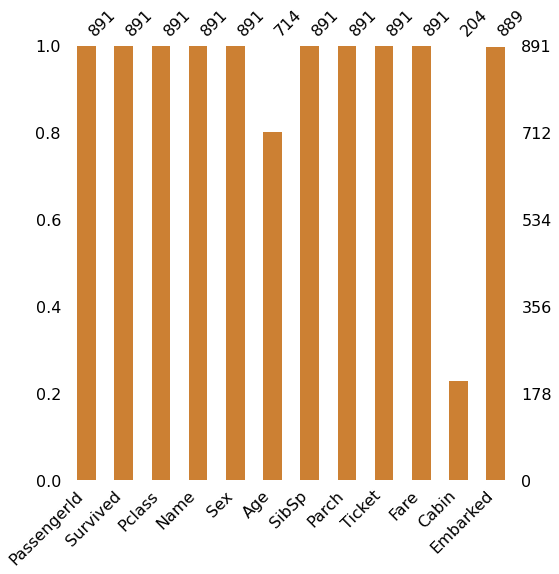

In [ ]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

%matplotlib inline

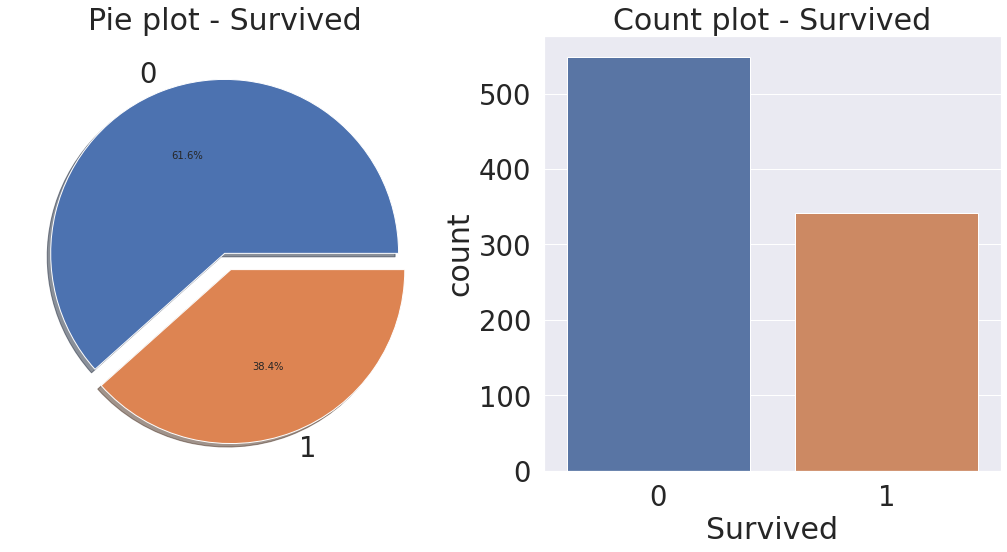

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_train.Survived.unique()

array([0, 1])

In [ ]:
df_train.Pclass.unique()

array([3, 1, 2])

In [ ]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
df_train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df_train[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [ ]:
pd.crosstab(df_train['Pclass'],df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

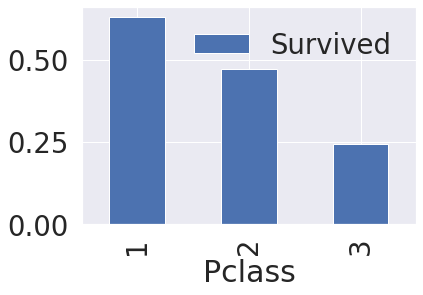

In [ ]:
df_train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False).plot.bar()

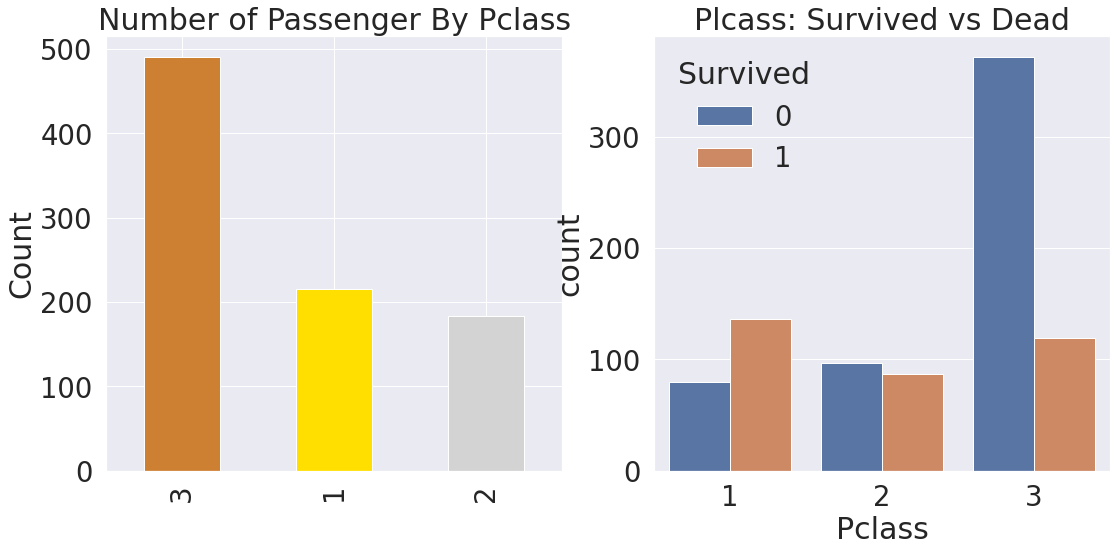

In [ ]:
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passenger By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('Plcass: Survived vs Dead')
plt.show()

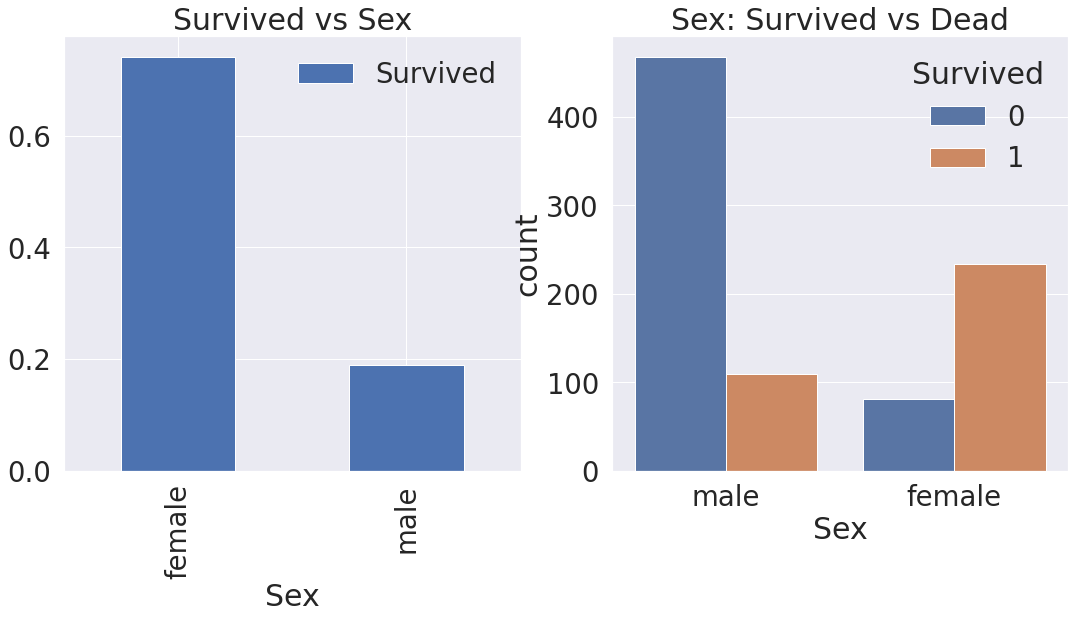

In [ ]:
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train[['Sex','Survived']].groupby('Sex').mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [ ]:
df_train[['Sex','Survived']].groupby('Sex').count()

,Survived
Sex,
female,314
male,577


In [ ]:
df_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
df_train['Age'].max()

80.0

In [ ]:
df_train['Age'].min()

0.42

In [ ]:
df_train['Age'].mean()

29.69911764705882

In [ ]:
df_train['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [ ]:
df_train['Age'].median() #중앙값

28.0

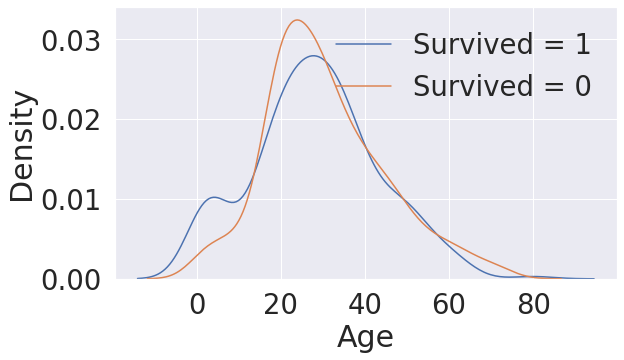

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

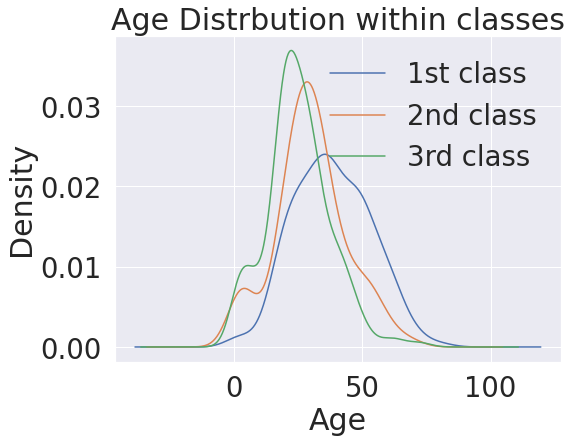

In [ ]:
plt.figure(figsize = (8,6))
df_train['Age'][df_train['Pclass']== 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass']== 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass']== 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distrbution within classes')
plt.legend(['1st class', '2nd class','3rd class'])

<function matplotlib.pyplot.show(close=None, block=None)>

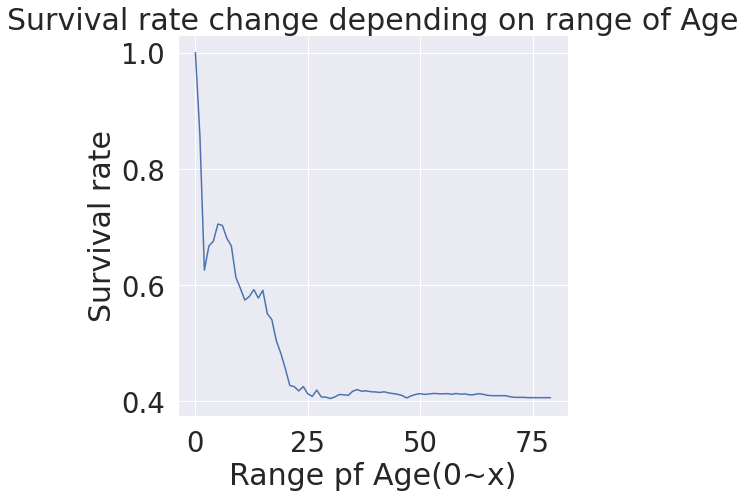

In [ ]:
cummulate_survival_ratio = []
for i in range(1, 81):
  cummulate_survival_ratio.append(df_train[df_train['Age']< i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range pf Age(0~x)')
plt.show

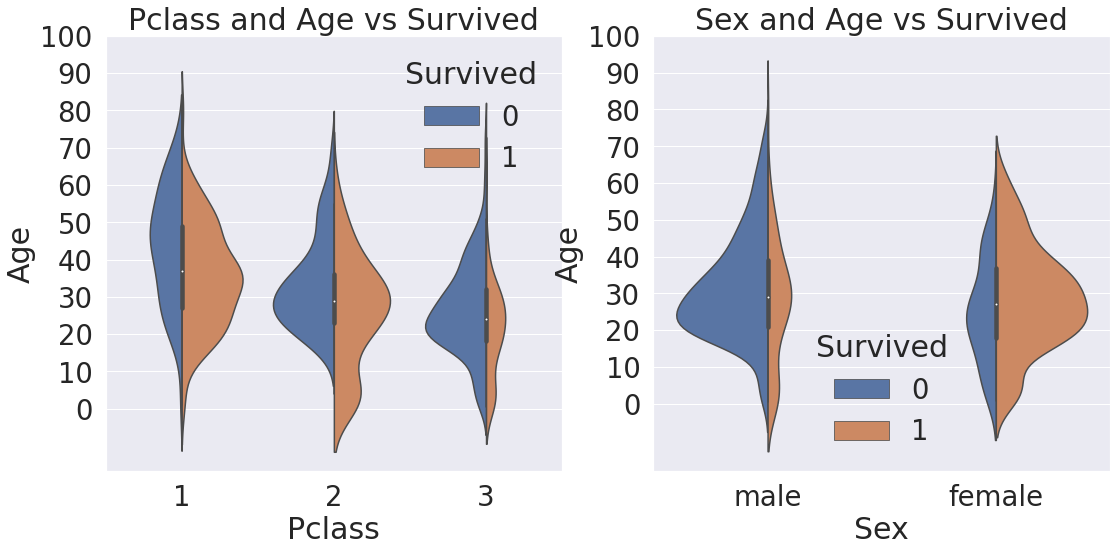

In [ ]:
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue = "Survived", data = df_train, scale='count',split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x = 'Sex', y='Age', hue="Survived", data = df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


In [ ]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<Axes: xlabel='Embarked'>

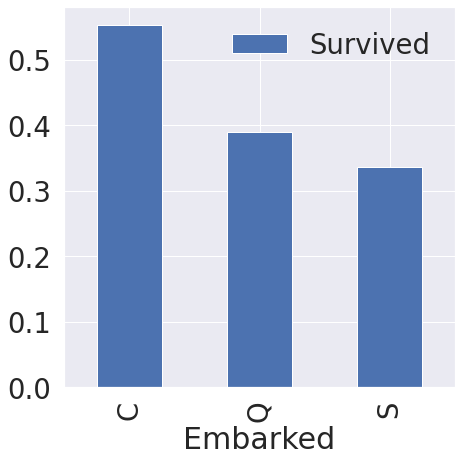

In [ ]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

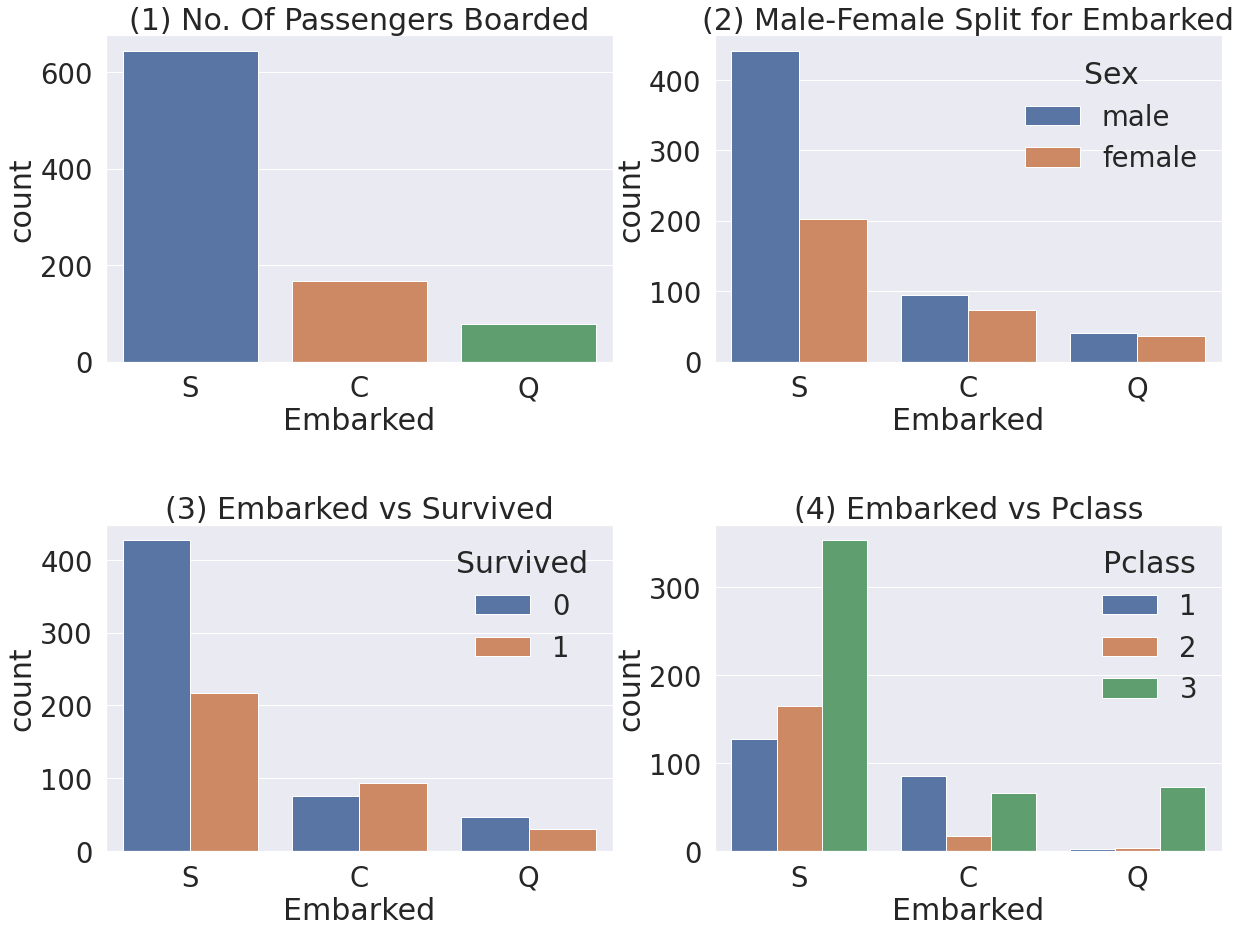

In [ ]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x = 'Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x ='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x = 'Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x = 'Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
df_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
df_train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
df_train['FamilySize'] = df_train['SibSp']+df_train['Parch']+1

In [ ]:
df_train['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

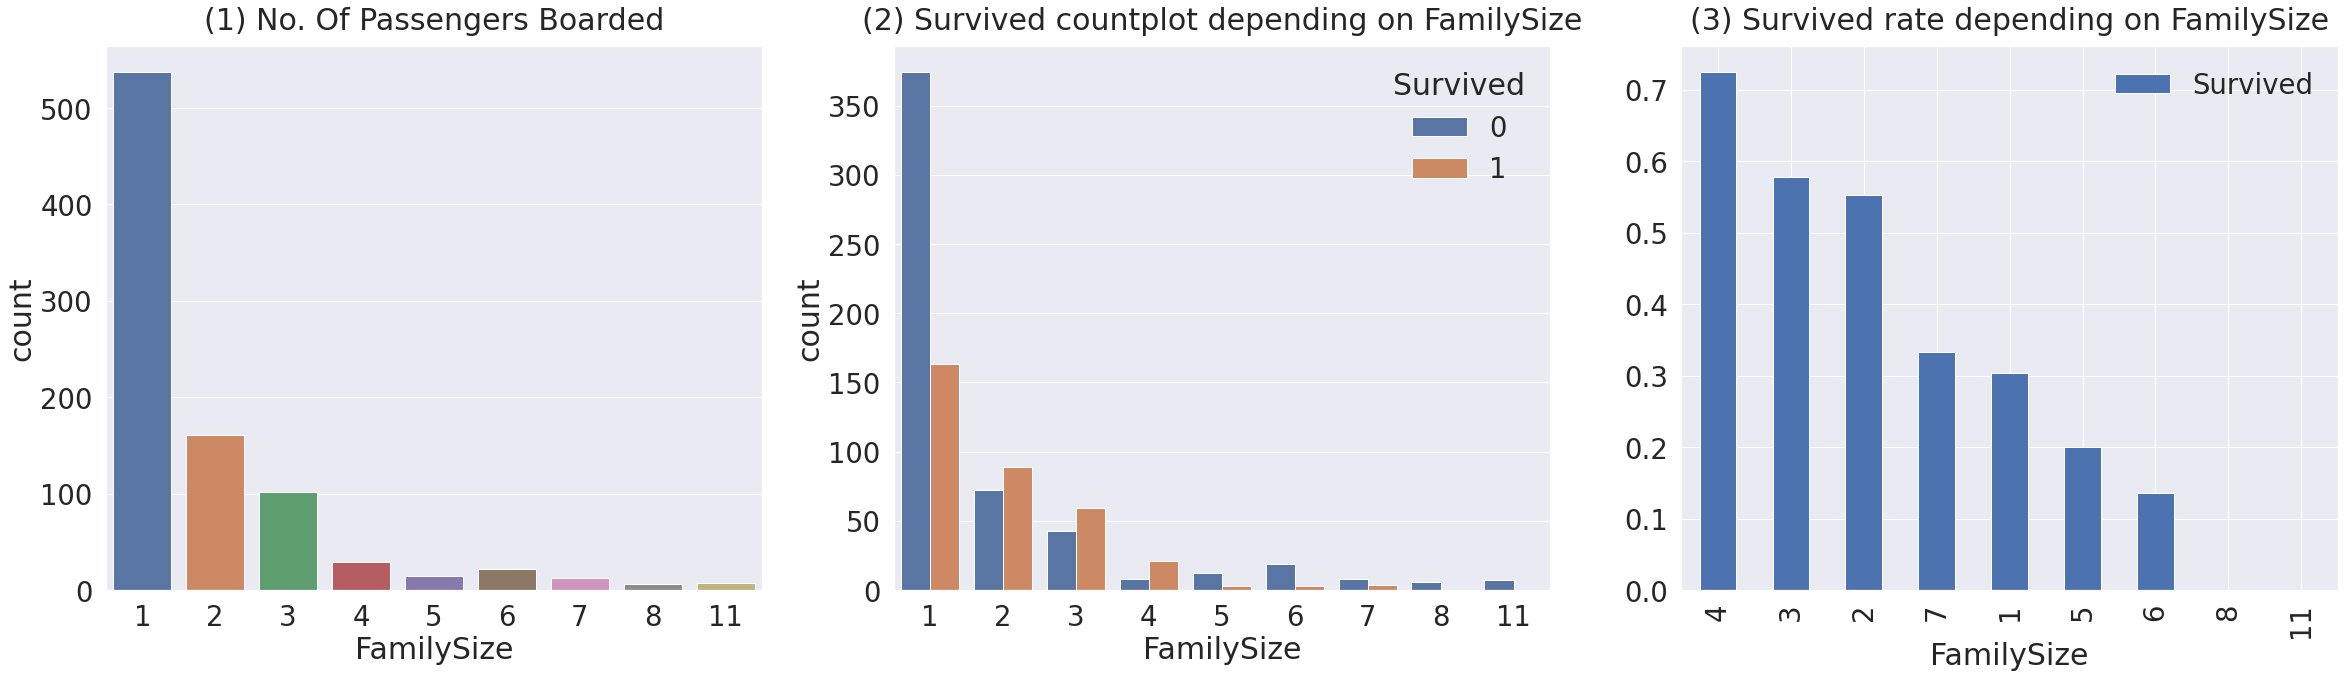

In [ ]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x= 'FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x ='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

메뉴:
김치 볶음밥
초밥
김치 찌개
콩나물 국밥
스파게티
비빔밥
짜장면
칼국수
삼계탕
돈까스
추천 메뉴: 스파게티


In [ ]:
df_train['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

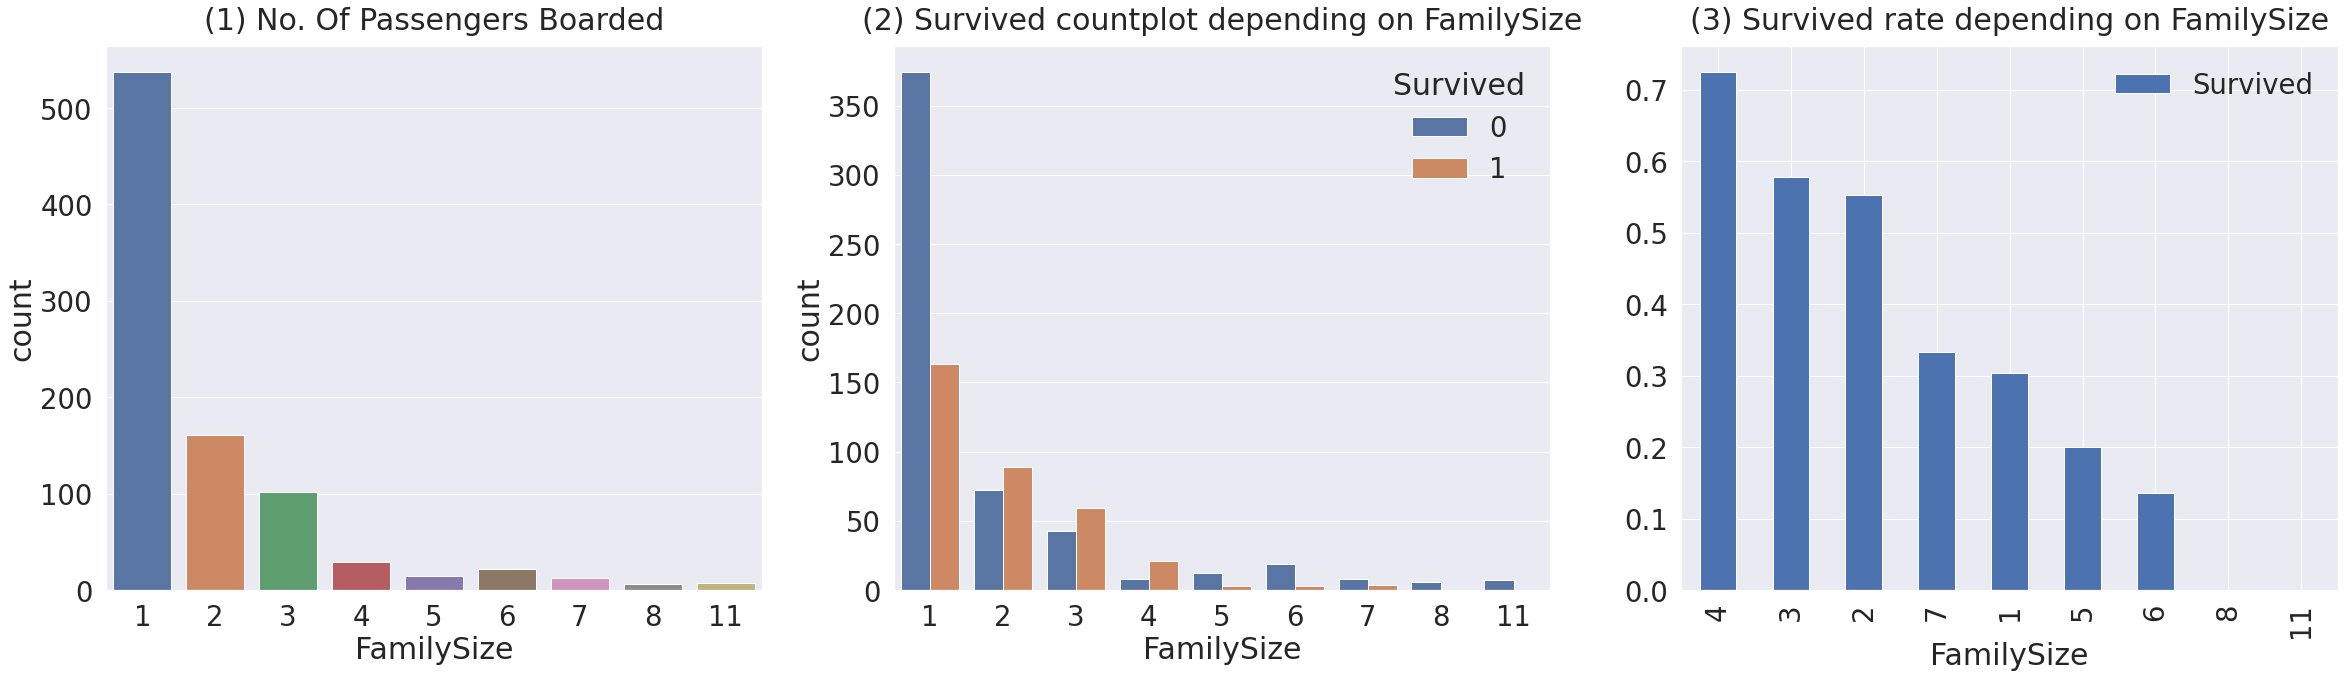

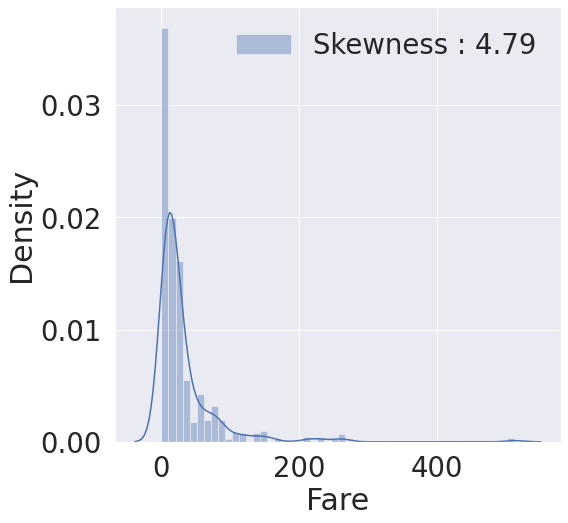

In [ ]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x= 'FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x ='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [ ]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

dtype('O')